# Notebook to Look at SMELT merge results 


In [19]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)

%matplotlib inline

In [2]:
def results_dataset(results_dir, date, ndays, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    dateend = date + datetime.timedelta(days=ndays-1)
    dateendstr = dateend.strftime('%Y%m%d')
    fname = os.path.join(results_dir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, dateendstr, grid_type))
    print (fname)
    grid = nc.Dataset(fname)
    return grid

In [15]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone.nc')

grid_B = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

final = '/ocean/sallen/allen/research/MEOPAR/myResults/merge-apr2016-SMELT/r6036ano/'
date = datetime.datetime(2016, 2, 7)
ptrc_T = results_dataset(final, date, 1, '1h', 'ptrc_T')
nitrateF = ptrc_T.variables['NO3'][23, :, :, :]
diatomF = ptrc_T.variables['PHY'][23, :, :, :]
miczF = ptrc_T.variables['MICZ'][23, :, :, :]
title1 = 'r6036'

initial = '/ocean/sallen/allen/research/MEOPAR/myResults/merge-apr2016-SMELT/r5912a/'
ni = results_dataset(initial, date, 1, '1h', 'ptrc_T')
nitrate0 = ni.variables['NO3'][23, :, :, :]
diatom0 = ni.variables['PHY'][23, :, :, :]
micz0 = ni.variables['MICZ'][23, :, :, :]
title0 = 'r5912'

/ocean/sallen/allen/research/MEOPAR/myResults/merge-apr2016-SMELT/r6036ano/SalishSea_1h_20160207_20160207_ptrc_T.nc
/ocean/sallen/allen/research/MEOPAR/myResults/merge-apr2016-SMELT/r5912a/SalishSea_1h_20160207_20160207_ptrc_T.nc


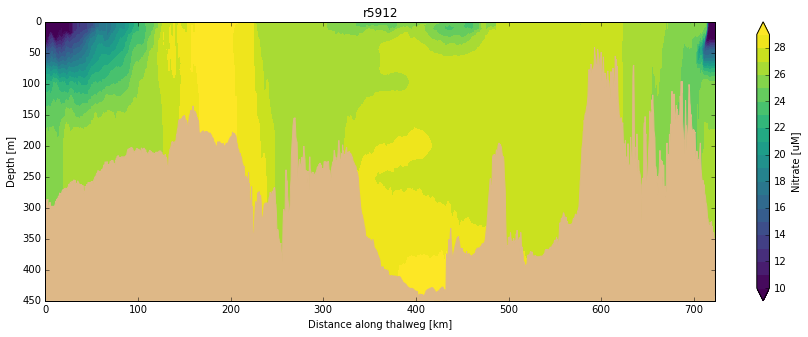

In [7]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(10., 30., 1)
cbar = vis.contour_thalweg(ax, nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title(title0)

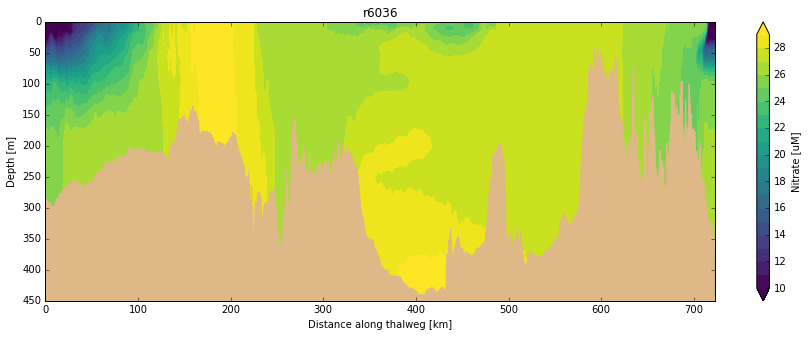

In [8]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, nitrateF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title(title1)

Nitrate max 0.440638 min -0.559999


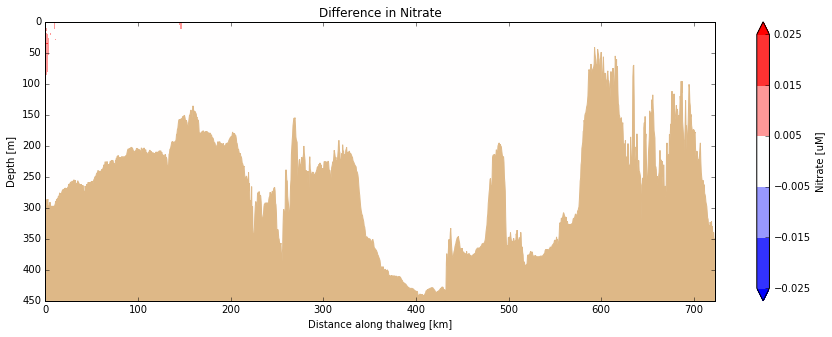

In [10]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = [-0.025, -0.015, -0.005, 0.005, 0.015, 0.025]
cbar = vis.contour_thalweg(ax, nitrateF-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Difference in Nitrate')
print ("Nitrate", 'max', np.max(nitrateF[:,:]-nitrate0[:,:]), 
               'min', np.min(nitrateF[:,:]-nitrate0[:,:]))

Surface Nitrate max 0.440638 min -0.559999


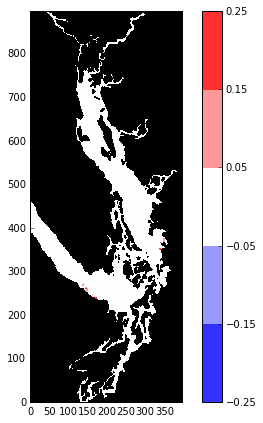

In [38]:
depthlevel = 0
fig, ax = plt.subplots(1, 1, figsize=(7,7))
viz_tools.set_aspect(ax)
clevels = [-0.25, -0.15, -0.05, 0.05, 0.15, 0.25]
mesh = ax.contourf(nitrateF[0]-nitrate0[0], clevels, cmap='bwr')
viz_tools.plot_land_mask(ax, grid_B, isobath=depthlevel)
plt.colorbar(mesh, ax=ax)
print ("Surface Nitrate", 'max', np.max(nitrateF[0,:]-nitrate0[0,:]), 
               'min', np.min(nitrateF[0,:]-nitrate0[0,:]))

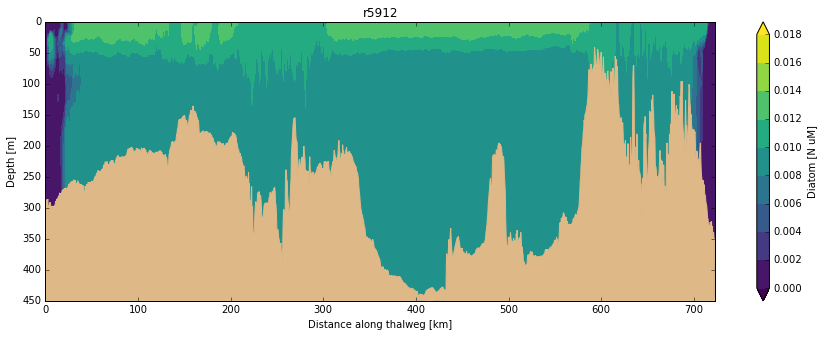

In [11]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 0.02, 0.002)
cbar = vis.contour_thalweg(ax, diatom0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Diatom [N uM]')
ax.set_title(title0)

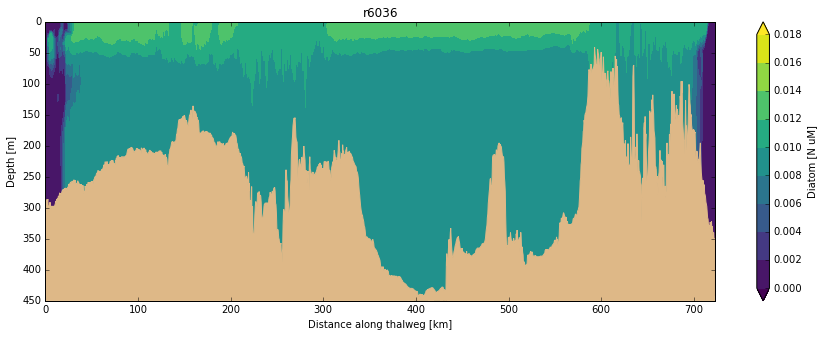

In [12]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 0.02, 0.002)
cbar = vis.contour_thalweg(ax, diatomF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Diatom [N uM]')
ax.set_title(title1)

Diatom max 0.000407978 min -0.000449497


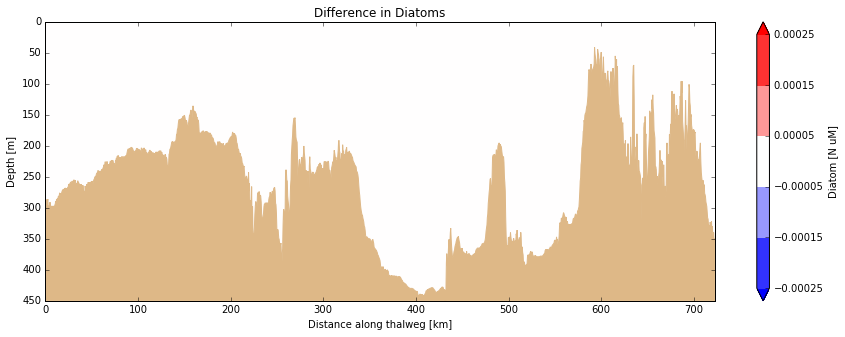

In [14]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = [-0.00025, -0.00015, -0.00005, 0.00005, 0.00015, 0.00025]
cbar = vis.contour_thalweg(ax, diatomF-diatom0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax.set_ylim([450,0])
cbar.set_label('Diatom [N uM]')
ax.set_title('Difference in Diatoms')
print ("Diatom", 'max', np.max(diatomF[:,:]-diatom0[:,:]), 
               'min', np.min(diatomF[:,:]-diatom0[:,:]))

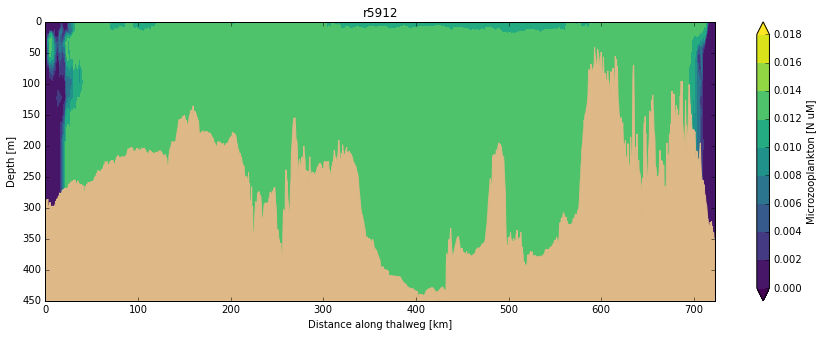

In [16]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 0.02, 0.002)
cbar = vis.contour_thalweg(ax, micz0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Microzooplankton [N uM]')
ax.set_title(title0)

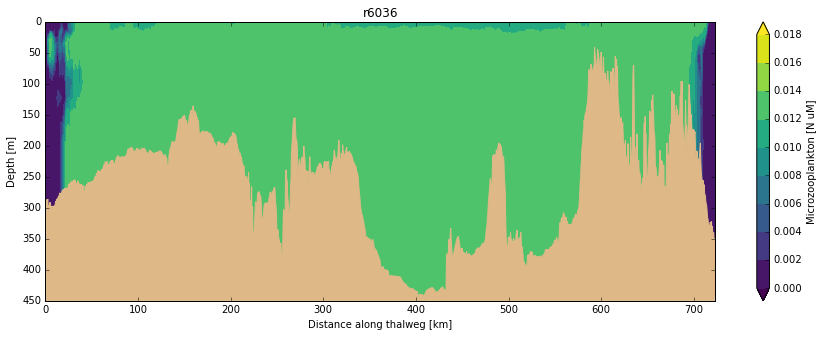

In [17]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 0.02, 0.002)
cbar = vis.contour_thalweg(ax, miczF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Microzooplankton [N uM]')
ax.set_title(title1)

Microzooplankton max 0.000407751 min -0.000428563


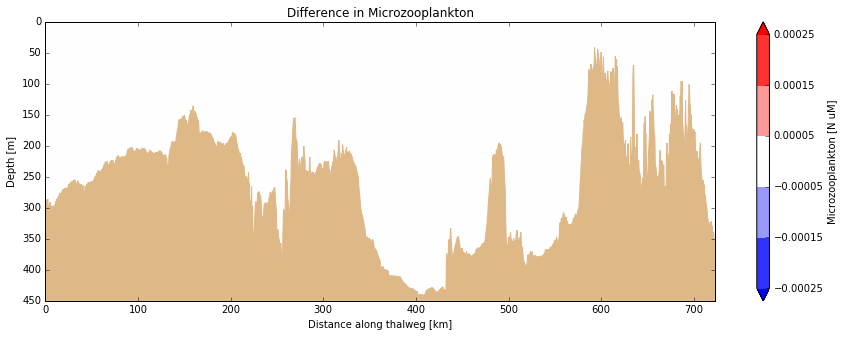

In [18]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = [-0.00025, -0.00015, -0.00005, 0.00005, 0.00015, 0.00025]
cbar = vis.contour_thalweg(ax, miczF-micz0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax.set_ylim([450,0])
cbar.set_label('Microzooplankton [N uM]')
ax.set_title('Difference in Microzooplankton')
print ("Microzooplankton", 'max', np.max(miczF[:,:]-micz0[:,:]), 
               'min', np.min(miczF[:,:]-micz0[:,:]))

No major differences. Small surface nitrate differences in southern Juan de Fuca and near Bellingham.